In [1]:
from RUL_part import *

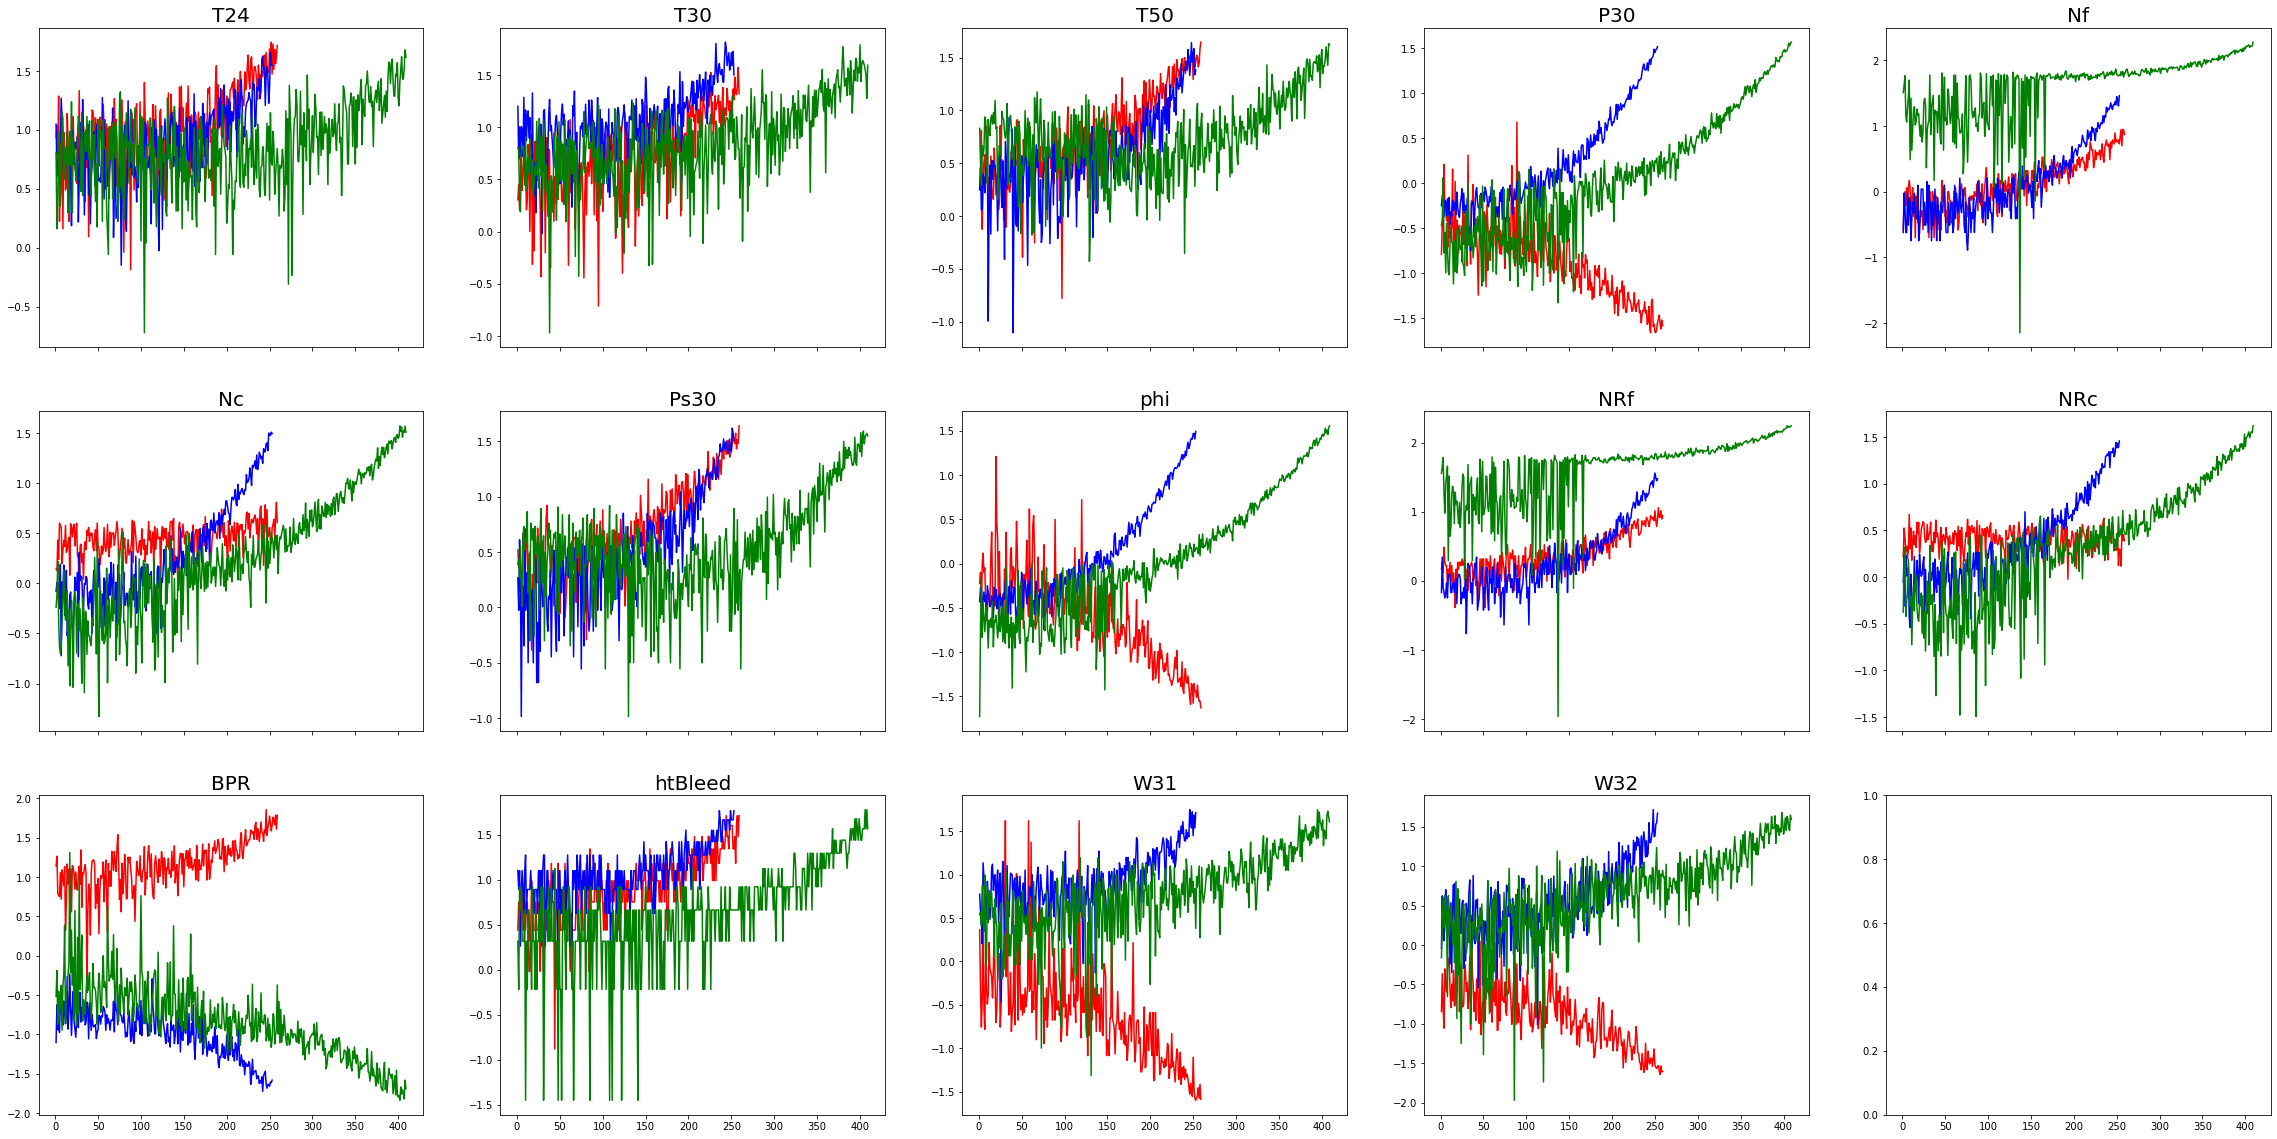

In [3]:
df_train_unit = df_train.groupby("Unit").agg(list).reset_index()
column_final =['T24', 'T30', 'T50', 'P30', 'Nf', 'Nc', 'Ps30',
             'phi', 'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32']
fig, ax = plt.subplots(3,5, figsize = (40,20), sharex = True)
m=0
for i in range(0,3):
    for j in range(0,5):
        if m == 14: break
        sensor = column_final[m]
#         for unit in range(len(df_train_unit)):
#             ax[i,j].scatter(df_train_unit.loc[unit,"Time"],
#                          df_train_unit.loc[unit,sensor])
        ax[i,j].plot(df_train_unit.loc[0,"Time"],
                          df_train_unit.loc[0,sensor],'r')
        ax[i,j].plot(df_train_unit.loc[1,"Time"],
                  df_train_unit.loc[1,sensor],'b')
        ax[i,j].plot(df_train_unit.loc[70,"Time"],
          df_train_unit.loc[70,sensor],'g')
        ax[i,j].set_title(sensor,fontsize=20)
        m+=1
        
#ax[0,0].scatter(data_HCF.time.values,data_HCF.opset1.values)
plt.show()

In [ ]:
5,9,14,15 4,8,13,14

(array([11., 21., 24.,  0.,  0.,  6., 22.,  9.,  4.,  3.]),
 array([-0.01863419, -0.01424677, -0.00985935, -0.00547192, -0.0010845 ,
         0.00330293,  0.00769035,  0.01207777,  0.0164652 ,  0.02085262,
         0.02524005]),
 <BarContainer object of 10 artists>)

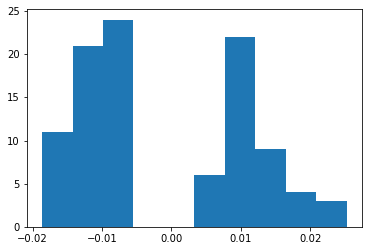

In [17]:
mat = df_train.values
num_unit = max(df_train.loc[:,"Unit"])
z_array = np.zeros((num_unit,1))
for idx_unit in range(num_unit):
    mat_unit = mat[np.where(mat[:,0]==idx_unit+1)][:,[4,8]]
    sum_z = 0
    for idx_sensor in range(2):
        x = np.arange(0,len(mat_unit[:,idx_sensor]))
        y = mat_unit[:,idx_sensor]
        z = np.polyfit(x,y,1)
        sum_z += z[0]
    z_array[idx_unit] = sum_z
plt.hist(z_array)

In [18]:
label_train_trend = np.zeros((num_unit,1))
for idx_unit in range(num_unit):
    if z_array[idx_unit]>0:
        label_train_trend[idx_unit] = 1
    elif z_array[idx_unit]<0:
        label_train_trend[idx_unit] = -1

In [19]:
label_train_trend - train_label #完全一致！

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

# 看看测试集

In [51]:
mat = df_test.values
num_unit = max(df_test.loc[:,"Unit"])
z_array = np.zeros((num_unit,1))
for idx_unit in range(num_unit):
    mat_unit = mat[np.where(mat[:,0]==idx_unit+1)][:,[4,8,13,14]]
    sum_z = 0
    for idx_sensor in range(4):
        x = np.arange(0,len(mat_unit[:,idx_sensor]))
        y = mat_unit[:,idx_sensor]
        z = np.polyfit(x,y,1)
        if idx_sensor == 4:
            sum_z += -z[0]
        else:
            sum_z += z[0]
    z_array[idx_unit] = sum_z

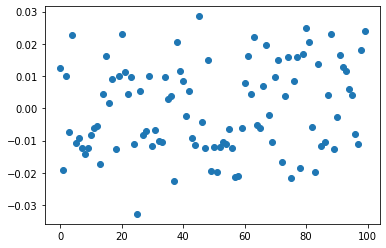

In [52]:
plt.scatter(np.arange(0,num_unit),z_array)

In [53]:
label = np.zeros((num_unit,1))
for idx_unit in range(num_unit):
    if z_array[idx_unit]>0:
        label[idx_unit] = 1
    elif z_array[idx_unit]<0:
        label[idx_unit] = -1

In [57]:
np.where(np.abs(label - test_label)==2)

(array([35, 36, 87], dtype=int64), array([0, 0, 0], dtype=int64))